In [3]:
import json
import yaml
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
config = yaml.safe_load(open("/gscratch/balazinska/enhaoz/VOCAL-UDF/configs/config.yaml", "r"))
import re
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [4]:
def plot_udf(dataset, udf):
    # Create a figure and axis for the boxplot
    fig, ax = plt.subplots(1, 1, figsize=(3, 2))  # Adjust the figsize as needed

    # Define LLM models, tasks, number of new UDFs, and hatch patterns
    methods = ['dsl_udf_included', 'nl_udf_included', 'dsl_udf_excluded', 'nl_udf_excluded']
    labels = ['dsl_incl', 'nl_incl', 'dsl_excl', 'nl_excl']
    hatch_patterns = ['...', '///', '\\\\\\', 'xxx', 'OO', '|||', '+++']

    all_data = []
    # Iterate through LLM models
    for i, method in enumerate(methods):
        print(f"######## {method} ########")
        f1_data = []
        # Iterate through runs and questions
        if method in ['nl_udf_excluded', 'nl_udf_included']:
            for run_id in range(5):
                for question_id in range(10):
                    try:
                        with open(os.path.join(config['output_dir'], "udf_exclusion", dataset, method, "gpt-4-1106-preview", f"udf-{udf}_run-{run_id}_question-{question_id}.json"), "r") as f:
                            data = json.load(f)
                        f1_data.append(data["f1"])
                    except Exception as e:
                        print(e)
                        f1_data.append(0)
                        continue
        elif method in ['dsl_udf_excluded']: # plot only the first run, since the results are the same
            for question_id in range(10):
                try:
                    with open(os.path.join(config['output_dir'], "udf_exclusion", dataset, method, "gpt-4-1106-preview", f"udf-{udf}_run-0_question-{question_id}.json"), "r") as f:
                        data = json.load(f)
                    f1_data.append(data["f1"])
                except Exception as e:
                    print(e)
                    f1_data.append(0)
                    continue
        else:
            f1_data.append(1)
        all_data.append(f1_data)

    # Create a grouped boxplot for F1 scores
    bp_f1 = ax.boxplot(all_data,
                        sym='.',
                        showfliers=False,
                        patch_artist=True,
                        labels=labels,
                        medianprops=dict(color='black'))

    # fill with colors and hatches
    for i, patch in enumerate(bp_f1['boxes']):
        patch.set_facecolor(CB_color_cycle[i])
        patch.set_hatch(hatch_patterns[i])

    # Customize the plot labels and legend
    plt.title(f"{dataset}: {udf}")
    ax.set(ylabel="F1 Score")
    ax.set_ylim(bottom=0, top=1.05)
    plt.xticks([])
    fig.legend(bp_f1["boxes"], labels, prop={"size": 10}, loc='upper center', bbox_to_anchor=(0.5, 0.07), fancybox=True, shadow=False, ncol=2)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.show()

######## dsl_udf_included ########
######## nl_udf_included ########
[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/outputs/udf_exclusion/clevr/nl_udf_included/gpt-4-1106-preview/udf-Behind_run-0_question-6.json'
[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/outputs/udf_exclusion/clevr/nl_udf_included/gpt-4-1106-preview/udf-Behind_run-1_question-6.json'
[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/outputs/udf_exclusion/clevr/nl_udf_included/gpt-4-1106-preview/udf-Behind_run-2_question-6.json'
[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/outputs/udf_exclusion/clevr/nl_udf_included/gpt-4-1106-preview/udf-Behind_run-3_question-6.json'
######## dsl_udf_excluded ########
######## nl_udf_excluded ########
[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/outputs/udf_exclusion/clevr/nl_udf_excluded/gpt-4-1106-preview/udf-Behind_run-0_question-8.jso

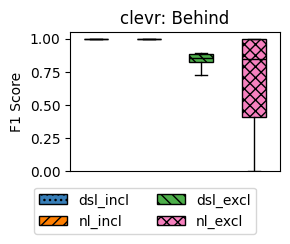

######## dsl_udf_included ########
######## nl_udf_included ########
######## dsl_udf_excluded ########
######## nl_udf_excluded ########
[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/outputs/udf_exclusion/clevr/nl_udf_excluded/gpt-4-1106-preview/udf-Color_brown_run-0_question-6.json'


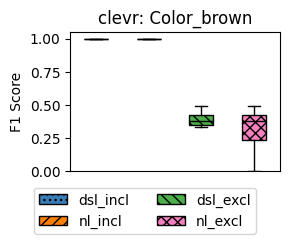

######## dsl_udf_included ########
######## nl_udf_included ########
######## dsl_udf_excluded ########
######## nl_udf_excluded ########
[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/outputs/udf_exclusion/clevr/nl_udf_excluded/gpt-4-1106-preview/udf-Color_cyan_run-1_question-5.json'
[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/outputs/udf_exclusion/clevr/nl_udf_excluded/gpt-4-1106-preview/udf-Color_cyan_run-2_question-5.json'
[Errno 2] No such file or directory: '/gscratch/balazinska/enhaoz/VOCAL-UDF/outputs/udf_exclusion/clevr/nl_udf_excluded/gpt-4-1106-preview/udf-Color_cyan_run-3_question-5.json'


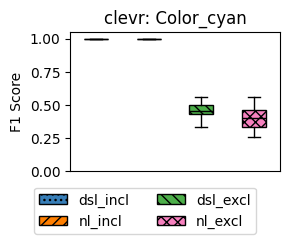

In [5]:
plot_udf('clevr', 'Behind')
plot_udf('clevr', 'Color_brown')
plot_udf('clevr', 'Color_cyan')